<a href="https://colab.research.google.com/github/dvircohen0/Machine-Learning-Algorithms-From-Scratch/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import keras
from keras.layers import Conv2D, Flatten, Dense, Reshape,Conv2DTranspose
from keras.layers.convolutional import Deconvolution2D
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

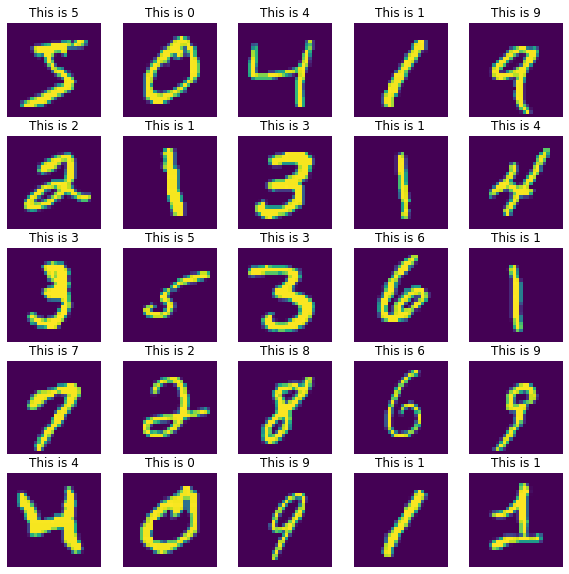

In [4]:
(xt,yt), (xe,ye) = keras.datasets.mnist.load_data()

fig, axs = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        ax = axs[i,j]
        ax.imshow(xt[5*i+j])
        ax.axis('off')
        ax.set_title('This is '+str(yt[5*i+j]))

Convolntal Autoencoder
![picture](https://www.researchgate.net/profile/Xifeng-Guo/publication/320658590/figure/fig1/AS:614154637418504@1523437284408/The-structure-of-proposed-Convolutional-AutoEncoders-CAE-for-MNIST-In-the-middle-there.png)

In [5]:
train, test = keras.datasets.mnist.load_data()
ds = np.vstack((train[0], test[0]))
ds = ds[:,:,:, np.newaxis]
train_y = train[1].reshape(-1,1)
test_y = test[1].reshape(-1,1)
y = np.vstack((train_y, test_y))
ds.shape

(70000, 28, 28, 1)

In [6]:
input_img = keras.Input(shape=(28, 28, 1))

x = Conv2D(32, (14, 14),strides=(2,2) ,activation='relu', padding='same')(input_img)
x = Conv2D(64, (7, 7),strides=(2,2) ,activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3),strides=(2,2) ,activation='relu')(x)
x = Flatten()(x)
encoded = Dense(10)(x)

x = Dense(1152,activation='relu')(encoded)
x = Reshape((3,3,128))(x)

x = Conv2DTranspose(64,(3,3),strides=(2,2), activation='relu',padding='valid')(x)
x = Conv2DTranspose(32,(5,5),strides=2, activation='relu',padding='same')(x)
decoded= Conv2DTranspose(1,(5,5),strides=2,padding='same')(x)

ae = keras.Model(input_img, decoded)
ae.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 32)        6304      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          100416    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                11530     
_________________________________________________________________
dense_1 (Dense)              (None, 1152)              12672 

In [7]:

ae.compile(optimizer='adam', loss=keras.losses.mean_squared_error)
ae.fit(ds, ds,epochs=10, batch_size=128,shuffle=True,)

Epoch 1/10
547/547 [==============================] - 147s 267ms/step - loss: 3251.2437
Epoch 2/10
547/547 [==============================] - 146s 267ms/step - loss: 1190.6970
Epoch 3/10
488/547 [=========================>....] - ETA: 15s - loss: 1035.0717

KeyboardInterrupt: ignored

In [129]:
decoded_imgs = ae.predict(x_test)

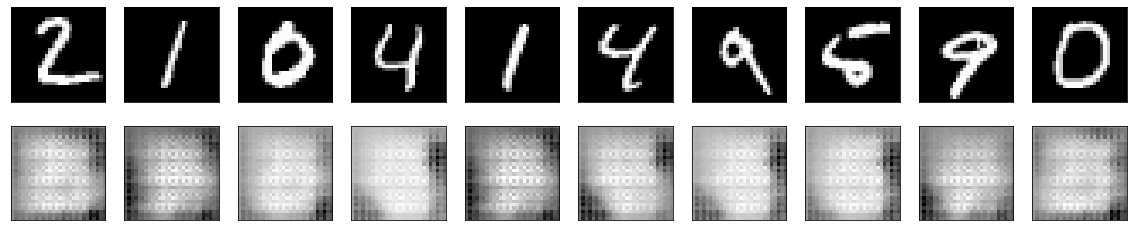

In [134]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()